In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score 
from sklearn.metrics import classification_report, f1_score, average_precision_score, precision_recall_fscore_support

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.isnull().values.any()

False

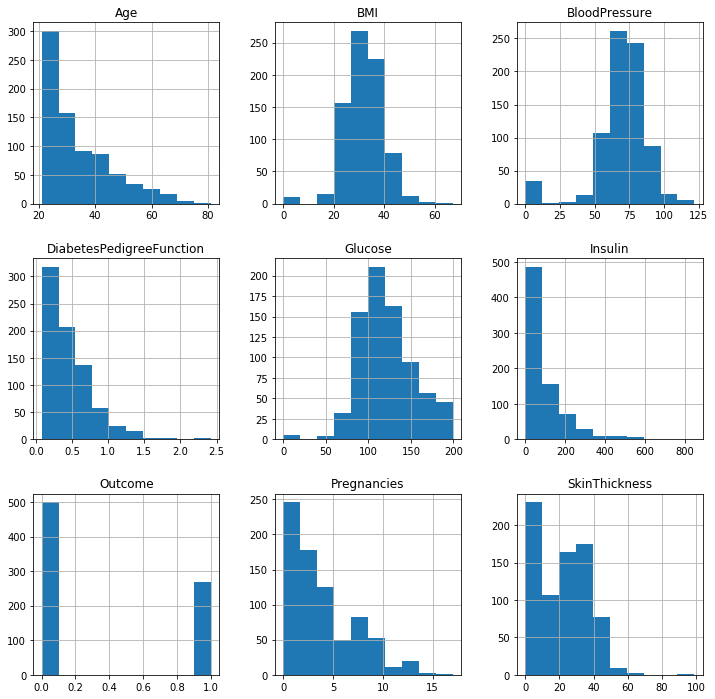

In [7]:
df.hist(figsize=(12, 12))
plt.show()

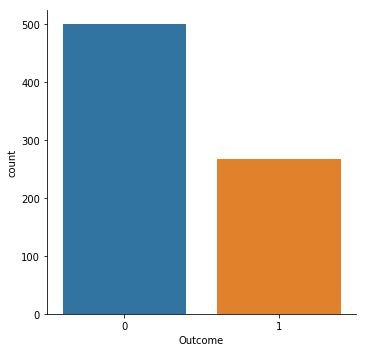

In [8]:
sns.catplot('Outcome', data=df, kind='count')

<Figure size 288x288 with 0 Axes>

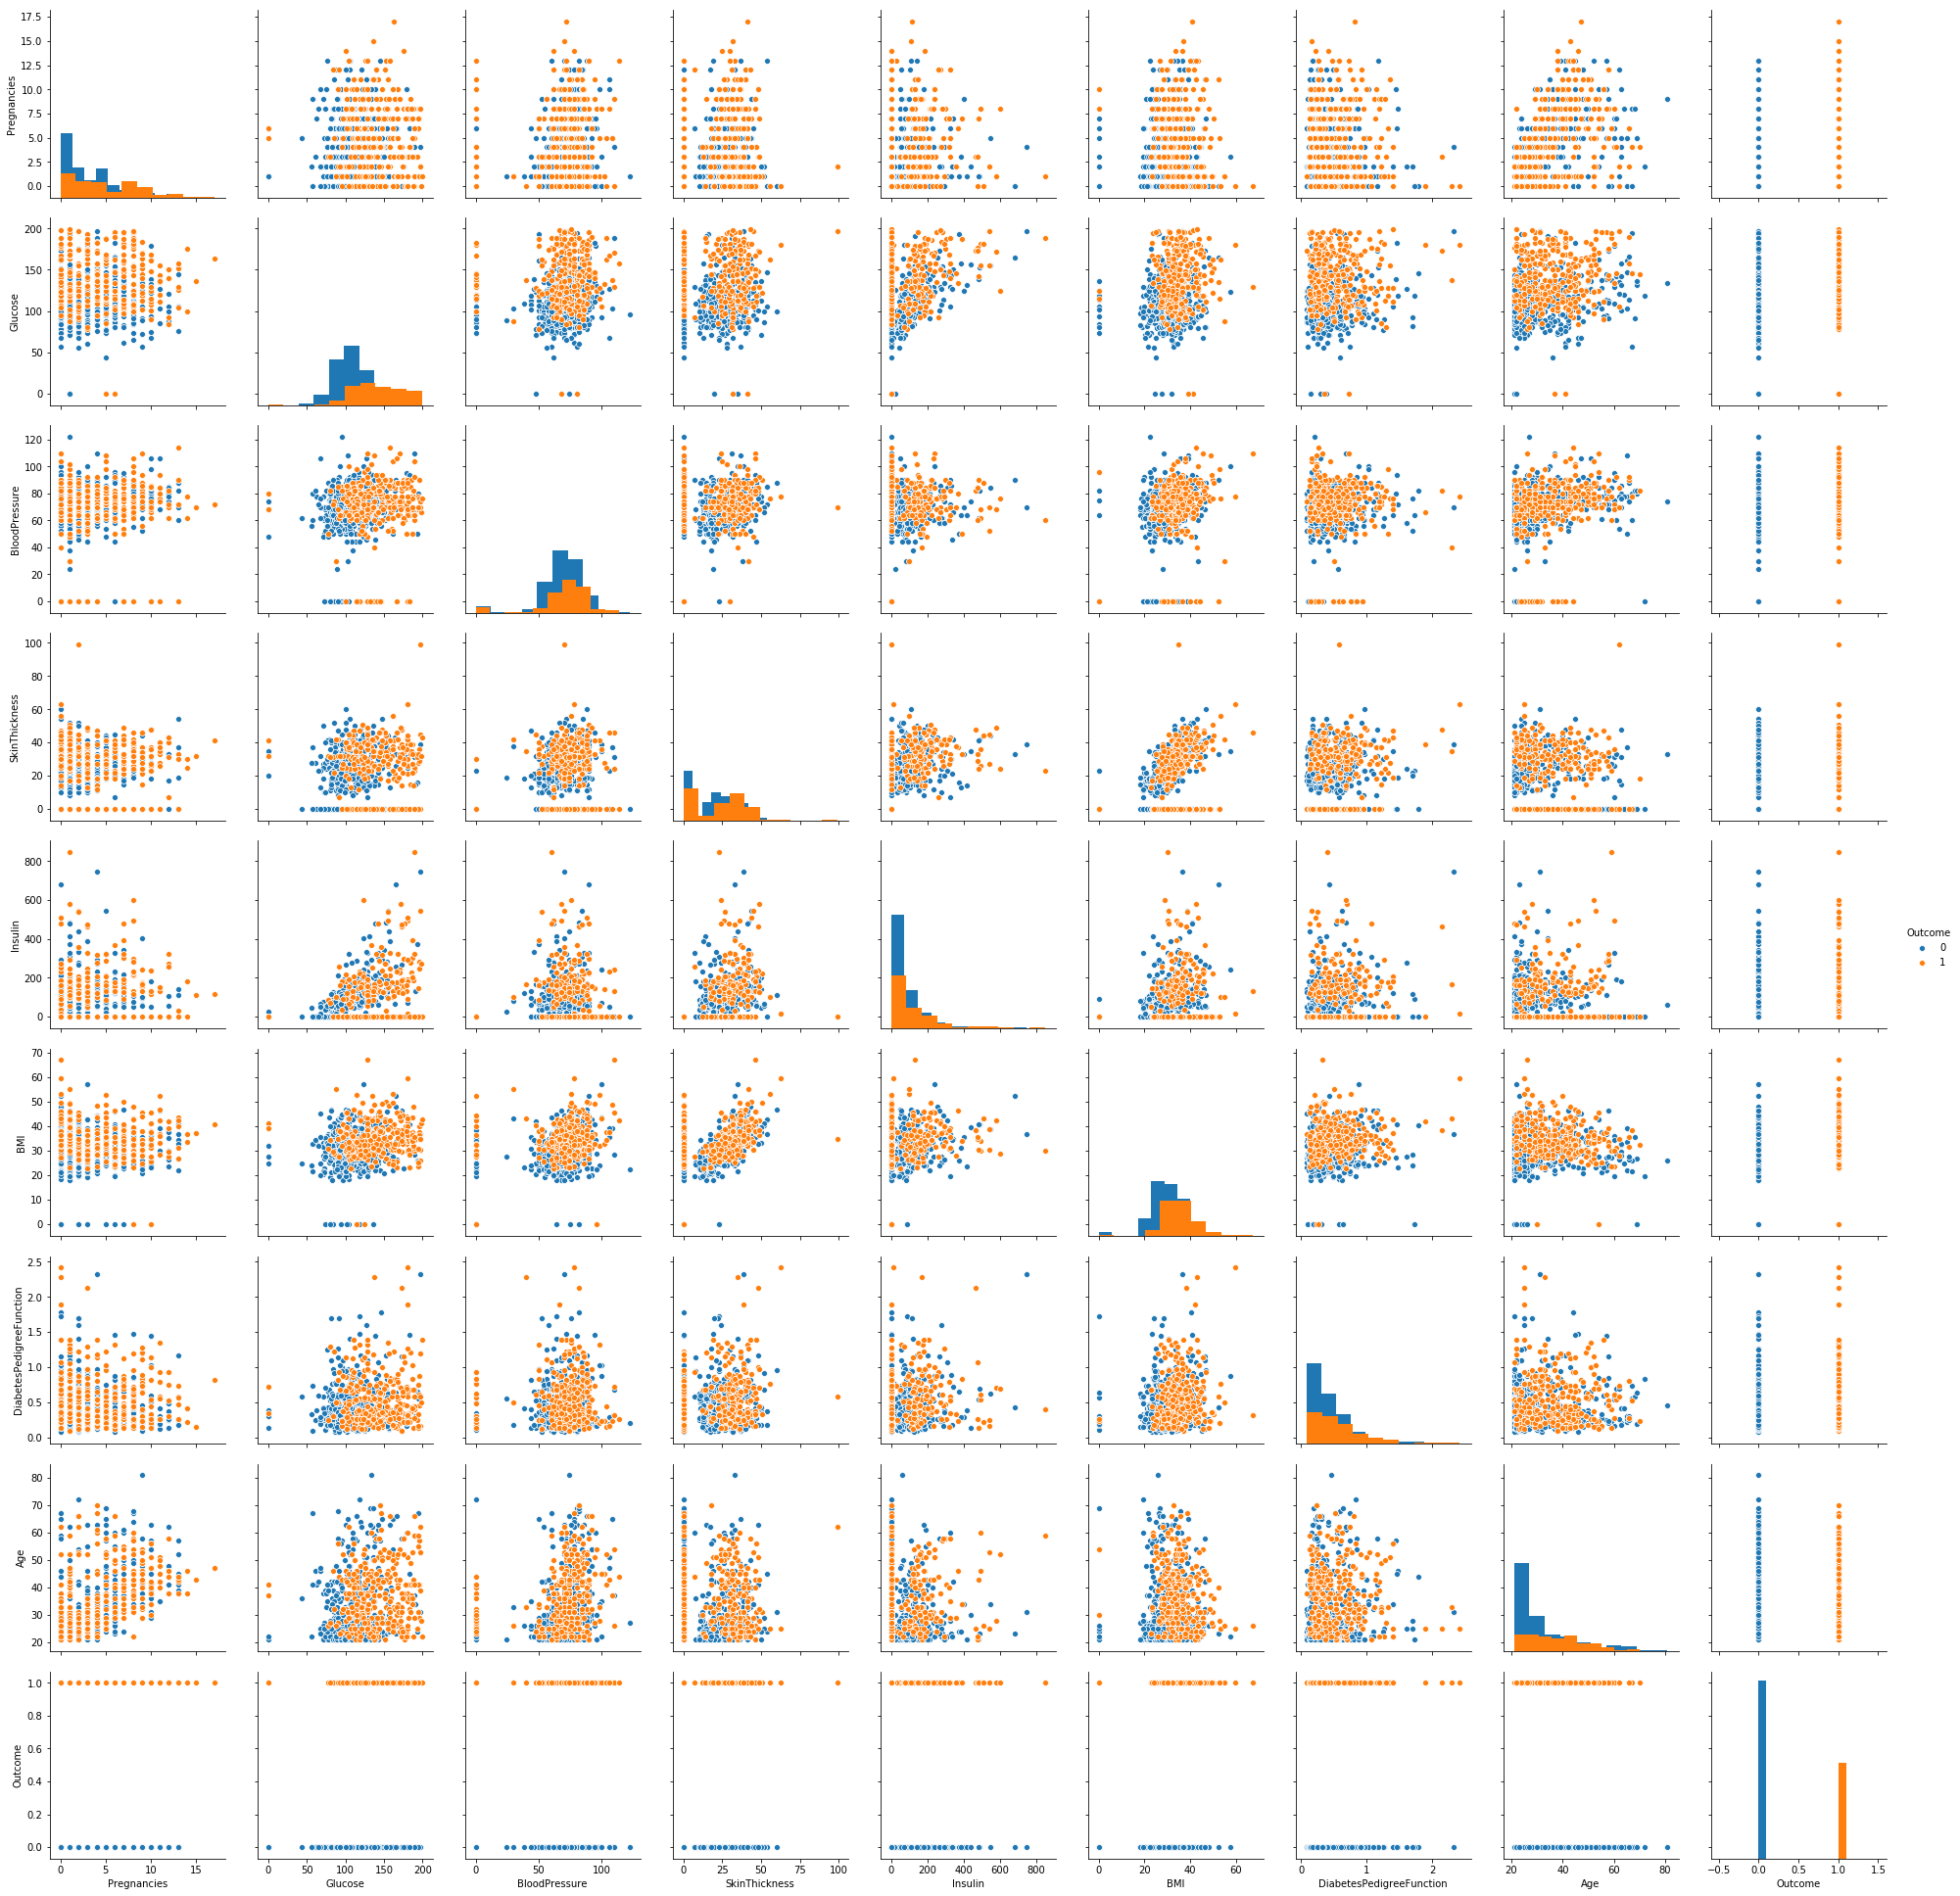

In [9]:
plt.figure(figsize=(4, 4))
sns.pairplot(df, hue='Outcome', height=3, diag_kind='hist')

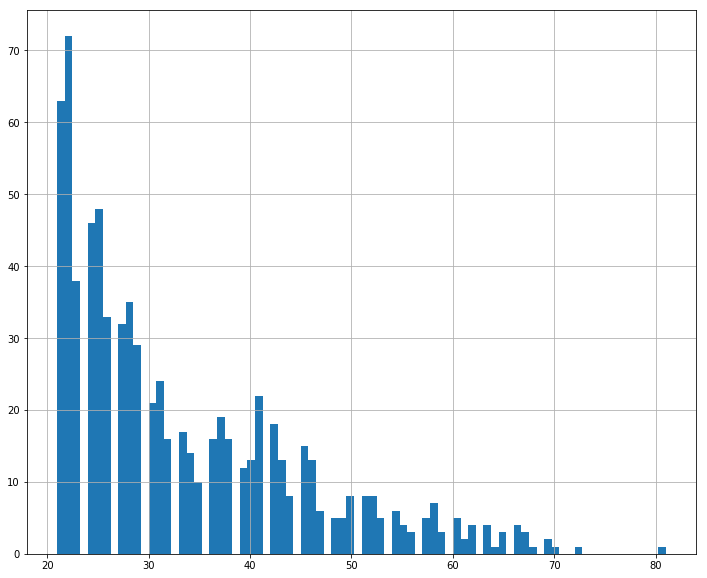

In [10]:
plt.figure(figsize=(12, 10))
df.Age.hist(bins=80)

In [11]:
print(f"The most of the patients are olds : {df.Age.mean()}")

The most of the patients are olds : 33.240885416666664


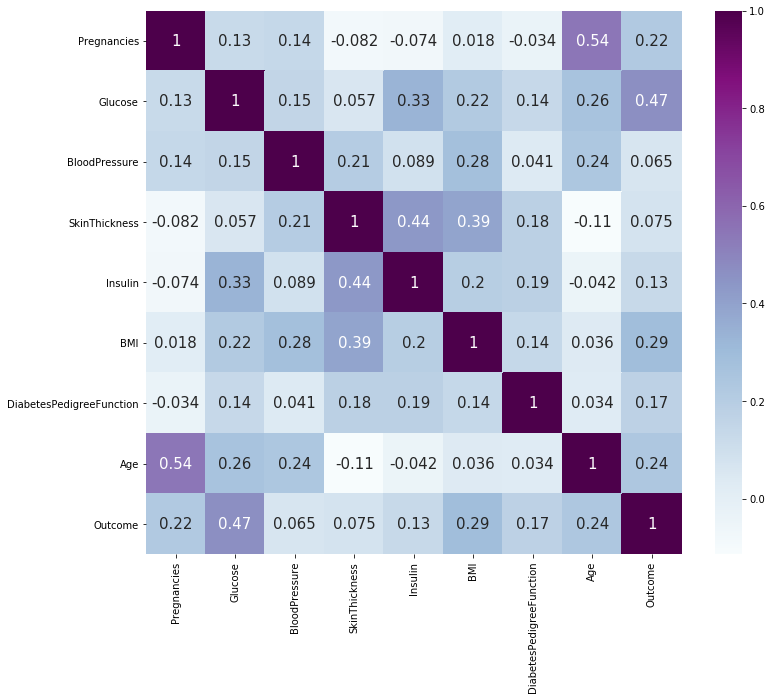

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="BuPu", annot_kws={"size":15})

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
diabetes_map = {True: 1, False: 0}

In [15]:
df['Outcome'] = df['Outcome'].map(diabetes_map)

In [16]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
df['Glucose']=df['Glucose'].replace(0,np.nan)

In [19]:
df['BloodPressure']=df['BloodPressure'].replace(0,np.nan)

In [20]:
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)

In [21]:
df['Insulin']=df['Insulin'].replace(0,np.nan)

In [22]:
df['BMI']=df['BMI'].replace(0,np.nan)

In [23]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [24]:
fill_0 = SimpleImputer(strategy = "mean")
df2 = df
clean_data = fill_0.fit_transform(df)
df = pd.DataFrame(data = clean_data, columns=list(df.columns.values))

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [25]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [26]:
num_true = len(df.loc[df['Outcome'] == True])
num_false = len(df.loc[df['Outcome'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [27]:
feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
#random_state: número aleatório para garantir divisões diferentes a cada execução

In [28]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


In [29]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 1]), 100 * (len(df.loc[df['Outcome'] == 1]) / len(df))))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 0]), 100 * (len(df.loc[df['Outcome'] == 0]) / len(df))))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 100 * (len(y_train[y_train[:] == 1]) / len(y_train))))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 100 * (len(y_train[y_train[:] == 0]) / len(y_train))))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 100 * (len(y_test[y_test[:] == 1]) / len(y_test))))
print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 100 * (len(y_test[y_test[:] == 0]) / len(y_test))))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


In [30]:
#################################################Bayes Gaussian############################################################
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [32]:
nb_predict_train = nb_model.predict(X_train)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Acurácia: 0.7523


In [33]:
nb_predict_test = nb_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Acurácia: 0.7403


In [34]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       151
         1.0       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [35]:
#################################################Árvore de Decisão############################################################
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [36]:
dt_predict_train = dt_model.predict(X_train)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_train, dt_predict_train)))

Acurácia: 1.0000


In [37]:
dt_predict_test = dt_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, dt_predict_test)))

Acurácia: 0.6970


In [38]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, dt_predict_test))

Confusion Matrix
[[111  40]
 [ 30  50]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76       151
         1.0       0.56      0.62      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.70      0.70       231



In [39]:
kfold = KFold(n_splits=10, random_state=22) # k=10 splits the data into 10 equal parts

C:\Users\erikldr\Anaconda3\envs\mineracao\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [40]:
# Starting with the original dataset and then doing centering and scaling
features = df[df.columns[:8]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
X=pd.DataFrame(features_standard,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X['Outcome']= df['Outcome']

In [41]:
xyz=[]
accuracy=[]
classifiers=['Decision Tree', 'Naive Bayes']
models=[DecisionTreeClassifier(), GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:8]], X['Outcome'], cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)   
cv_models_dataframe.columns=['CV Mean']    
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Naive Bayes,0.747386
Decision Tree,0.693985


In [42]:
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T

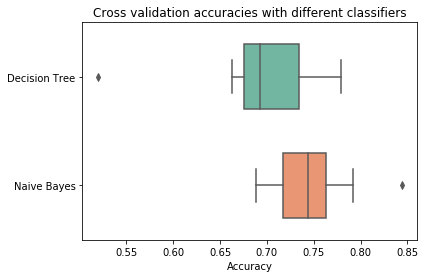

In [43]:
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

In [44]:
# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

C:\Users\erikldr\Anaconda3\envs\mineracao\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


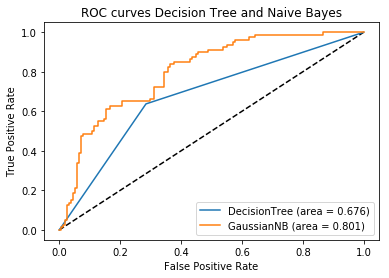

In [45]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Tree, tpr_Tree, label='DecisionTree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_nb, tpr_nb, label='GaussianNB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves Decision Tree and Naive Bayes')
plt.legend(loc='best')
plt.show()

In [0]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_Tree, precision_Tree, label='Decision Tree')
plt.plot(recall_nb, precision_nb, label='Gaussian NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()